In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
exp_data = pd.read_csv('data/processed_experience_data.csv')

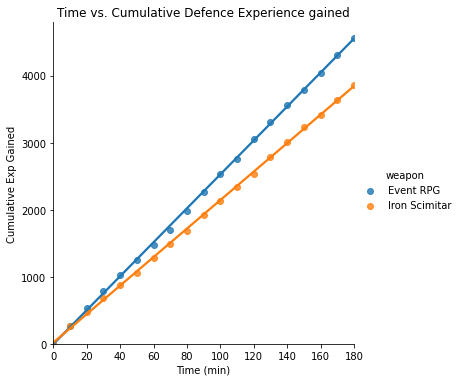

In [3]:
experience_regplot = sns.lmplot(
    x='time', 
    y='cumulative_exp_gained', 
    data=exp_data, 
    hue='weapon'
)
experience_regplot.set(
    title='Time vs. Cumulative Defence Experience gained',
    xlabel='Time (min)',
    ylabel='Cumulative Exp Gained'
)
plt.ylim(0, )
plt.show()

In [33]:
X = exp_data['time'].unique()

cumulative_exp = exp_data['cumulative_exp_gained'].to_numpy().reshape(2, -1)
y_rpg, y_scim = cumulative_exp[0, ], cumulative_exp[1, ]

In [34]:
y_rpg

array([   0,  268,  532,  792, 1032, 1244, 1480, 1692, 1984, 2264, 2532,
       2764, 3048, 3308, 3560, 3792, 4044, 4308, 4564], dtype=int64)

In [35]:
X = sm.add_constant(X)

sm_rpg_regressor = sm.OLS(endog=y_rpg, exog=X)
rpg_results = sm_rpg_regressor.fit()
rpg_summary = rpg_results.summary()

sm_scim_regressor = sm.OLS(endog=y_scim, exog=X)
scim_results = sm_scim_regressor.fit()
scim_summary = scim_results.summary()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [36]:
print('Event RPG Regression Results:\n{0}\n'.format(rpg_summary.tables[1]))
print('Iron Scimitar Regression Results:\n{0}'.format(scim_summary.tables[1]))

Event RPG Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8737     12.430     -0.312      0.759     -30.098      22.351
x1            25.3109      0.118    214.541      0.000      25.062      25.560

Iron Scimitar Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3579     10.050      1.827      0.085      -2.845      39.561
x1            21.2533      0.095    222.815      0.000      21.052      21.455


The slopes (x1) along with their confidence intervals suggest that on average, we will gain around 25 experience per minute using the Event RPG and 21 experience per minute using the Iron Scimitar.